In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import copy
from itertools import cycle, islice
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('default')

# Begin here to import PCA and UMAP and Leiden Cluster Labels

In [2]:
pca_analysis = pd.read_csv('pca_results.csv', header = 0)
pca_analysis

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-5.556225,-0.257718,0.186786,-2.800096,0.050726,-0.010704,-0.560362,-3.071789,-2.945048,-1.946824,...,0.303822,-0.612891,0.786153,0.211624,2.257351,-2.356015,-0.341442,-0.339096,1.482910,1.897889
1,-7.209537,-7.481978,-0.162740,8.018522,-3.006617,-0.118053,-2.389257,-1.063644,0.655481,0.671241,...,0.676715,1.028544,-0.240437,2.396688,-1.040607,-2.215252,0.433334,-1.978341,-1.557420,-1.496098
2,-2.694430,1.583664,0.663126,-2.205646,1.789024,1.950146,2.070498,-1.606405,-0.911324,-1.386201,...,-0.900483,0.381840,0.508998,-1.640191,-0.271188,-2.021171,-1.815547,0.543203,-0.545106,-4.339565
3,10.143292,1.368525,-1.209819,0.700065,2.906171,0.036243,-1.272864,0.387448,-0.858374,0.004126,...,0.268223,0.930400,1.813390,-1.373973,1.640196,0.371741,0.094577,2.202551,1.797724,-0.176037
4,1.112835,8.152793,-1.332337,4.252488,-1.963194,-5.671656,-0.372425,0.136140,0.812770,-0.105267,...,1.280552,-1.423236,1.136208,1.226654,-0.449812,0.695716,2.179164,-0.441089,-4.958036,-0.704306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,9.601180,0.180180,-1.452582,0.237509,-5.028788,2.764379,-1.264232,3.897541,-0.976161,2.617133,...,3.105048,-0.072174,1.672519,-0.894084,0.917678,0.983014,-0.654412,2.679015,1.488883,0.120752
2634,-2.847886,-3.722200,0.217039,4.692725,0.254992,0.191907,-0.682628,-0.280466,2.262647,-5.913675,...,-0.989160,-2.677764,3.058086,-0.395191,-2.663330,1.620732,-0.324856,-2.521088,-2.440412,-3.539200
2635,-0.785408,-6.718586,-1.598860,4.170279,0.784721,-1.120681,-0.720857,1.615402,-0.169170,0.838488,...,-1.545383,-1.617926,-0.695416,-0.899763,0.566286,0.562708,-0.790847,-0.561099,-0.105485,0.583873
2636,0.281260,-5.921852,-1.162900,7.345957,0.484282,0.413800,-0.496882,-1.101007,1.018069,-0.100571,...,-1.825900,-2.570674,-0.177524,0.114567,2.184290,-0.260320,2.743233,-1.380870,3.580742,1.298842


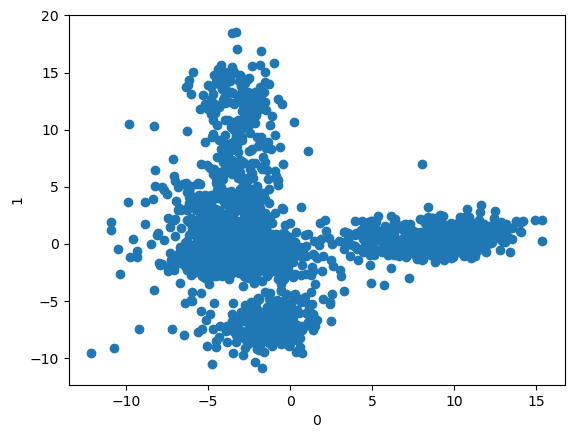

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
pcx = '0'
pcy = '1'
ax.scatter(pca_analysis[pcx], pca_analysis[pcy])
ax.set_xlabel(pcx)
ax.set_ylabel(pcy)
plt.show()

In [4]:
n_pcs = 7
values_matrix = pca_analysis.values[:, 0:n_pcs]
print(values_matrix.shape)

(2638, 7)


In [5]:
import numpy as np

# Assuming values_matrix is your data matrix

mean = np.mean(values_matrix, axis=0)
std_dev = np.std(values_matrix, axis=0)

# Calculate the bounds for 3 standard deviations
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Create 23 bins within the bounds and add 2 bins for the outliers
bins = np.empty((10, values_matrix.shape[1]))
for col in range(values_matrix.shape[1]):
    bins[1:-1, col] = np.linspace(lower_bound[col], upper_bound[col], num=8)
    bins[0, col] = -np.inf  # Bin for values below lower bound
    bins[-1, col] = np.inf  # Bin for values above upper bound

# Digitize the values
digitized = np.empty_like(values_matrix)
for col in range(values_matrix.shape[1]):
    digitized[:, col] = np.digitize(values_matrix[:, col], bins=bins[:, col])




In [6]:
# digitized now contains the indices of the bins to which each value belongs
print(np.shape(bins))
print(np.shape(digitized))

(10, 7)
(2638, 7)


In [7]:
#count the number of points in each bin combo. We have 25 bins for each x,y
dict25 = {}
for row in digitized:
    str_row = ' '.join(map(str, row.astype(int)))
    if  str_row not in dict25.keys():
        dict25[str_row] = 1
    else:
        dict25[str_row] = dict25[str_row] + 1

In [8]:
len(dict25)

1146

In [9]:
#convert to probabilities
total_counts = sum(dict25.values())
dict25_sp = {}
for k, v in dict25.items():
    dict25_sp[k] = v / total_counts

In [10]:
# We have to sort it from highest probability to lowest in the txt output

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(dict25_sp.items(), key=lambda x: x[1], reverse=True))
#sorted_dict

## Clustering Algorithm Results added here

In [11]:
# this is the clustering algorithm read in from the txt file vector data is the dimension space after clustering
microstates = pd.read_csv( "scanpy_pcs.txt.negmap" , sep="|" , skiprows= [1])
microstates.columns = [col.strip() for col in microstates.columns]
microstates["Vector"] = microstates["Vector"].apply(lambda v: np.array(v.strip().strip("[|]").split(), dtype= int))
microstates.head()

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.024640,1,0,"[4, 5, 5, 4, 5, 4, 5]"
2,0.019712,2,0,"[4, 5, 5, 4, 5, 5, 6]"
3,0.013268,3,0,"[4, 5, 5, 4, 5, 4, 4]"
4,0.012130,4,0,"[4, 5, 5, 4, 5, 4, 6]"


In [12]:
microstates.shape

(1146, 4)

done to ensure original files are not modified

In [13]:
#find unique Pk in microstates
unique_pk_micro = microstates["Pk"].unique()
print(len(unique_pk_micro))

379


In [14]:
# Finding the highest and lowest probabilities
highest_prob = microstates['Prob'].max()
lowest_prob = microstates['Prob'].min()

highest_prob, lowest_prob


(0.0272934040940106, 0.0003790750568613)

### Scanpy_pcs

this is the another file not sure what it is but it probably has the clusters birth and death info again 

In [15]:
#Now we want to relabel the Pk value of the Pk centers because we had to kill them during persistent homology algorithm
#this is the proabalistic map, the 0.000379075 means 1/2638
peaks = pd.read_csv("scanpy_pcs.txt" , sep="|" , skiprows= [1])
peaks.columns = [col.strip() for col in peaks.columns]


#relabel the Pk values using Birth State Index
clusters_ids = peaks["Birth State Index"].unique()

for peak in clusters_ids:
    microstates['Pk'][peak] = peak


/var/folders/zy/fbwt9jj16vg4gzyd8mdl2mrm0000gn/T/ipykernel_14868/3746120935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microstates['Pk'][peak] = peak
/var/folders/zy/fbwt9jj16vg4gzyd8mdl2mrm0000gn/T/ipykernel_14868/3746120935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microstates['Pk'][peak] = peak
/var/folders/zy/fbwt9jj16vg4gzyd8mdl2mrm0000gn/T/ipykernel_14868/3746120935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [16]:
#  find unique Pk again after relabeling
unique_pk = microstates["Pk"].unique()
print(len(unique_pk))

455


In [17]:
# group dataframe by "Pk" and sum the "Prob" column for each group
cluster_probs = microstates.groupby('Pk')['Prob'].sum().to_dict()
cluster_probs = dict(sorted(cluster_probs.items(), key=lambda x: x[1])) #, reverse = True


In [18]:
# Function to find Pk value for a given vector element
def find_pk_for_vector_element(dataframe, vector_element):
    for index, row in dataframe.iterrows():
        if np.array_equal(row['Vector'], vector_element):
            return row['Pk']
    return None

pks_for_data = []
for i in range(len(digitized)):
    pks_for_data.append(find_pk_for_vector_element(microstates, digitized[i].astype(int)))

In [19]:
#print(pks_for_data)

In [20]:
#  find unique Pk again after relabeling
unique_pk = microstates["Pk"].unique()
print(len(unique_pk))

455


In [21]:
from collections import Counter

frequency = Counter(pks_for_data)
print(frequency)
# Extract keys where values are less than 5
keys_less_than = [key for key, value in frequency.items() if value < 5] #ari = 0.89 for <5
#print(keys_less_than)

Counter({0: 1060, 15: 241, 9: 227, 43: 126, 48: 73, 21: 58, 80: 44, 20: 28, 82: 19, 101: 19, 49: 18, 58: 15, 95: 14, 81: 12, 84: 11, 131: 10, 134: 10, 288: 9, 224: 8, 195: 7, 192: 7, 113: 6, 160: 6, 74: 6, 100: 6, 79: 6, 242: 5, 155: 5, 237: 5, 291: 5, 161: 5, 345: 5, 361: 5, 321: 5, 136: 5, 104: 4, 114: 4, 225: 4, 183: 4, 121: 4, 168: 4, 377: 4, 137: 4, 323: 4, 328: 4, 353: 4, 226: 3, 151: 3, 465: 3, 372: 3, 537: 3, 182: 3, 286: 3, 320: 3, 187: 3, 610: 3, 295: 3, 331: 3, 365: 3, 206: 3, 207: 3, 356: 3, 362: 3, 384: 2, 388: 2, 396: 2, 397: 2, 404: 2, 407: 2, 222: 2, 412: 2, 425: 2, 427: 2, 439: 2, 452: 2, 457: 2, 467: 2, 238: 2, 240: 2, 474: 2, 487: 2, 489: 2, 249: 2, 255: 2, 256: 2, 258: 2, 264: 2, 538: 2, 268: 2, 554: 2, 276: 2, 279: 2, 579: 2, 590: 2, 289: 2, 294: 2, 608: 2, 619: 2, 628: 2, 303: 2, 681: 2, 694: 2, 316: 2, 714: 2, 740: 2, 769: 2, 334: 2, 335: 2, 336: 2, 338: 2, 344: 2, 348: 2, 349: 2, 351: 2, 861: 2, 359: 2, 866: 2, 876: 2, 896: 2, 369: 2, 936: 2, 371: 2, 1101: 2, 38

In [22]:
#based on this keeping the pk with highest probability
#making a new df to store the aggregated data
aggregated_data = microstates.groupby('Pk').apply(lambda x: x.loc[x['Prob'].idxmax()]).reset_index(drop=True)

# Convert the 'Vector' column to a list of integers
aggregated_data['Vector'] = aggregated_data['Vector'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
aggregated_data['Vector'] = aggregated_data['Vector'].apply(lambda x: [int(num) for num in x] if isinstance(x, list) else x)

# Displaying the first few rows of the new aggregated DataFrame with max probability
aggregated_data.head()

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"
2,0.005307,15,15,"[7, 5, 5, 4, 4, 5, 5]"
3,0.004928,20,20,"[4, 4, 5, 4, 5, 3, 4]"
4,0.004928,21,21,"[7, 5, 5, 5, 5, 5, 5]"


In [23]:
# find unique Pk again after relabeling
unique_pk_agg = aggregated_data["Pk"].unique()
print(len(unique_pk_agg))

455


In [24]:
# aggregated_data shape
aggregated_data.shape

(455, 4)

In [25]:
# save the aggregated data to a csv file
aggregated_data.to_csv('aggregated_data.csv', index=False)

same shape as the unique vales

In [26]:
# Merging 'microstates.csv' and 'peaks.csv' on 'Pk' and 'Birth State Index'
merged_data = pd.merge(aggregated_data, peaks, left_on='Pk', right_on='Birth State Index', how='left')

# Displaying the first few rows of the merged DataFrame
print(merged_data.shape)
merged_data.head()

(455, 8)


,Prob,State Index,Pk,Vector,Birth Probability,Death Probability,Birth State Index,Death State Index
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]",0.027293,-1.000000,0,-1
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]",0.008719,-1.000000,9,-1
2,0.005307,15,15,"[7, 5, 5, 4, 4, 5, 5]",0.005307,0.000758,15,329
3,0.004928,20,20,"[4, 4, 5, 4, 5, 3, 4]",0.004928,0.004549,20,28
4,0.004928,21,21,"[7, 5, 5, 5, 5, 5, 5]",0.004928,0.003033,21,47


In [27]:
# find missing values in the merged data
merged_data.isnull().sum()

Prob                 0
State Index          0
Pk                   0
Vector               0
Birth Probability    0
Death Probability    0
Birth State Index    0
Death State Index    0
dtype: int64

In [28]:
# Are Prob and Birth Probability the same for each row?
merged_data['Prob'].equals(merged_data['Birth Probability'])


True

In [29]:
# unique values Pk in merged data
unique_pk_merged = merged_data["Pk"].unique()
print(len(unique_pk_merged))

455


making new dataframe with pk values labelled for each row to the pca

In [30]:
# Add the Pk values as a new column
pca_analysis['Pk'] = pks_for_data  # pks_for_data should be a list with the same length as pca_analysis

# Make 'Pk' the first column by reordering the columns
cols = ['Pk'] + [col for col in pca_analysis.columns if col != 'Pk']
pca_analysis = pca_analysis[cols]

# save the pca_analysis to a csv file
pca_analysis.to_csv('pca_analysis.csv', index=False)

In [31]:
# Display the first few rows of the DataFrame to verify the column order
pca_analysis.head()


,Pk,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,-5.556225,-0.257718,0.186786,-2.800096,0.050726,-0.010704,-0.560362,-3.071789,-2.945048,...,0.303822,-0.612891,0.786153,0.211624,2.257351,-2.356015,-0.341442,-0.339096,1.482910,1.897889
1,383,-7.209537,-7.481978,-0.162740,8.018522,-3.006617,-0.118053,-2.389257,-1.063644,0.655481,...,0.676715,1.028544,-0.240437,2.396688,-1.040607,-2.215252,0.433334,-1.978341,-1.557420,-1.496098
2,0,-2.694430,1.583664,0.663126,-2.205646,1.789024,1.950146,2.070498,-1.606405,-0.911324,...,-0.900483,0.381840,0.508998,-1.640191,-0.271188,-2.021171,-1.815547,0.543203,-0.545106,-4.339565
3,80,10.143292,1.368525,-1.209819,0.700065,2.906171,0.036243,-1.272864,0.387448,-0.858374,...,0.268223,0.930400,1.813390,-1.373973,1.640196,0.371741,0.094577,2.202551,1.797724,-0.176037
4,384,1.112835,8.152793,-1.332337,4.252488,-1.963194,-5.671656,-0.372425,0.136140,0.812770,...,1.280552,-1.423236,1.136208,1.226654,-0.449812,0.695716,2.179164,-0.441089,-4.958036,-0.704306


In [32]:
# find the unique Pk in pca_analysis
unique_pk_pca = pca_analysis["Pk"].unique()
print(len(unique_pk_pca))


455


I did a couple pf merges and this is the only one that Birth Probability and the Prob in both columns match 

In [33]:
import ast

# save the merged data to a csv file
merged_data.to_csv('merged_data.csv', index=False)

# load the merged data from the csv file
final_data = pd.read_csv('merged_data.csv')

final_data.head()

,Prob,State Index,Pk,Vector,Birth Probability,Death Probability,Birth State Index,Death State Index
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]",0.027293,-1.000000,0,-1
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]",0.008719,-1.000000,9,-1
2,0.005307,15,15,"[7, 5, 5, 4, 4, 5, 5]",0.005307,0.000758,15,329
3,0.004928,20,20,"[4, 4, 5, 4, 5, 3, 4]",0.004928,0.004549,20,28
4,0.004928,21,21,"[7, 5, 5, 5, 5, 5, 5]",0.004928,0.003033,21,47


Since the 'Vector' column represents the dimensions made during clustering, we could consider each element of these vectors as features.
we can then compute the Pearson correlation matrix. This matrix will show the correlation between each pair of features across all clusters.

In [34]:
import ast

# Convert the 'Vector' column into actual lists
final_data['Vector'] = final_data['Vector'].apply(ast.literal_eval)

# Convert the 'Vector' lists into separate columns
vector_df = pd.DataFrame(final_data['Vector'].tolist())

# Incorporate the 'Prob' column if it's needed for the analysis
# For now, we'll focus on the vector data
# Combine the 'Pk' column with the vector dataframe
combined_df = pd.concat([final_data[['Pk', 'Prob']], vector_df], axis=1)


### Correlation Matrix

In [35]:
import ast

# Check the number of unique Pk values to ensure there are 379
num_unique_pks = pca_analysis['Pk'].nunique()
print(num_unique_pks)

# For each Pk, compute the mean of the vector dimensions
pk_means = pca_analysis.groupby('Pk').mean()

# We need a correlation matrix where each Pk value correlates with every other Pk value
# To achieve this, we use the transpose of the pk_means dataframe to compute the correlation
# This will treat each Pk as a separate entity and compute correlations between their mean vector values
pk_correlation_matrix_final = pk_means.T.corr()


455


In [36]:
pk_correlation_matrix_final

Pk,0,9,15,20,21,43,48,49,58,74,...,1131,1132,1134,1137,1139,1141,1142,1143,1144,1145
Pk,,,,,,,,,,,,,,,,,,,,,
0,1.000000,-0.200189,-0.645684,0.712468,-0.745376,0.303162,-0.530491,-0.183325,-0.645204,0.708625,...,-0.383937,-0.135388,-0.418388,0.398327,-0.083130,-0.471787,-0.093808,-0.087275,-0.486175,-0.029058
9,-0.200189,1.000000,-0.231954,-0.028508,-0.134667,-0.303583,-0.079677,-0.294708,-0.106394,-0.124040,...,-0.045980,0.650460,-0.139805,0.105482,0.694247,-0.182768,0.588094,0.270595,-0.056199,0.381531
15,-0.645684,-0.231954,1.000000,-0.378252,0.929986,-0.536824,0.472686,-0.265040,0.852299,-0.414535,...,0.406073,-0.125121,0.659801,-0.381253,-0.285345,0.745127,-0.210451,-0.075916,0.649889,-0.203461
20,0.712468,-0.028508,-0.378252,1.000000,-0.477011,-0.095848,-0.324777,-0.278747,-0.327384,0.672290,...,-0.276179,-0.049174,-0.250816,0.536807,-0.052946,-0.312075,-0.031407,0.007455,-0.295632,-0.061880
21,-0.745376,-0.134667,0.929986,-0.477011,1.000000,-0.538103,0.651603,-0.223106,0.791455,-0.469868,...,0.512328,-0.098037,0.549847,-0.481488,-0.154313,0.709251,-0.152561,-0.131529,0.629220,-0.227319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,-0.471787,-0.182768,0.745127,-0.312075,0.709251,-0.428900,0.409291,-0.210003,0.579899,-0.240480,...,0.303497,-0.174795,0.552641,-0.404390,-0.126082,1.000000,-0.289577,-0.093526,0.508989,-0.161094
1142,-0.093808,0.588094,-0.210451,-0.031407,-0.152561,-0.137533,-0.025975,-0.106696,-0.108094,-0.106972,...,0.036026,0.371839,-0.196990,0.198383,0.386386,-0.289577,1.000000,0.075393,-0.221277,0.328992
1143,-0.087275,0.270595,-0.075916,0.007455,-0.131529,-0.107483,-0.163185,0.080451,0.015623,-0.095962,...,-0.131127,0.387317,0.131806,-0.150283,0.137944,-0.093526,0.075393,1.000000,0.123600,0.455090


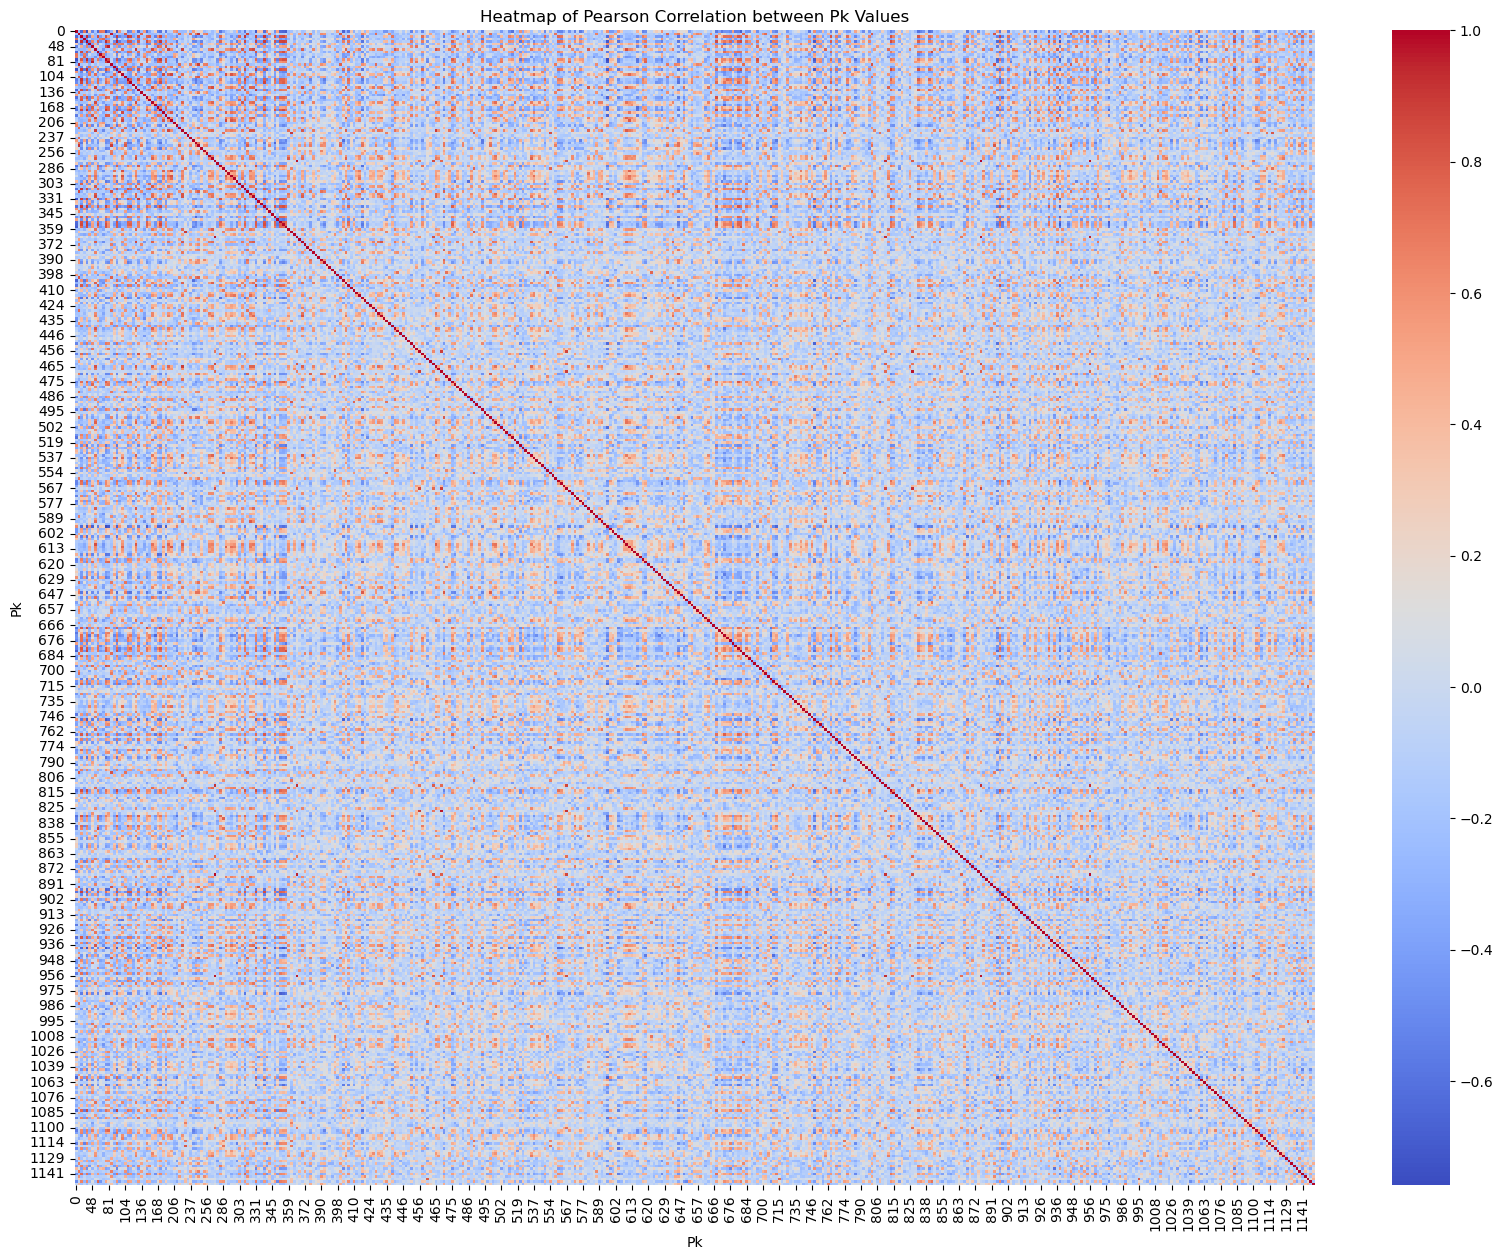

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the heatmap
plt.figure(figsize=(20, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(pk_correlation_matrix_final, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Heatmap of Pearson Correlation between Pk Values')

# Show the heatmap
plt.show()


In [38]:
# save the correlation matrix to a csv file
pk_correlation_matrix_final.to_csv('pk_correlation_matrix_final.csv')


In [39]:
from scipy.spatial.distance import cdist

# Convert the vector lists into a DataFrame for distance calculations
vector_df = pd.DataFrame(final_data['Vector'].tolist(), index=final_data['Pk'])

# Compute the Manhattan (cityblock) distances between all pairs of low-probability Pks
manhattan_distances = cdist(vector_df, vector_df, metric='cityblock')

# Convert the distance matrix to a DataFrame for easier manipulation
distance_df = pd.DataFrame(manhattan_distances, index=vector_df.index, columns=vector_df.index)

# Display the first few rows of the distance matrix for a glimpse
print(distance_df.shape)
distance_df.head()


(455, 455)


Pk,0,9,15,20,21,43,48,49,58,74,...,1131,1132,1134,1137,1139,1141,1142,1143,1144,1145
Pk,,,,,,,,,,,,,,,,,,,,,
0,0.0,6.0,4.0,4.0,4.0,6.0,6.0,8.0,7.0,2.0,...,7.0,8.0,8.0,4.0,6.0,7.0,11.0,10.0,10.0,4.0
9,6.0,0.0,8.0,8.0,6.0,10.0,8.0,8.0,9.0,8.0,...,9.0,2.0,10.0,6.0,2.0,11.0,7.0,8.0,12.0,2.0
15,4.0,8.0,0.0,8.0,2.0,10.0,6.0,12.0,3.0,6.0,...,7.0,8.0,4.0,8.0,10.0,3.0,15.0,10.0,6.0,8.0
20,4.0,8.0,8.0,0.0,8.0,8.0,10.0,10.0,9.0,4.0,...,11.0,10.0,10.0,2.0,8.0,9.0,13.0,12.0,12.0,6.0
21,4.0,6.0,2.0,8.0,0.0,8.0,4.0,10.0,3.0,6.0,...,5.0,8.0,4.0,6.0,8.0,5.0,13.0,10.0,6.0,6.0


In [40]:
# save the distance matrix to a csv file
distance_df.to_csv('distance_matrix.csv')

In [41]:
# see if the distance_df and filtered_pk_correlation_matrix have the same column names
print(distance_df.columns.equals(pk_correlation_matrix_final.columns))

True


In [42]:
# Ensuring that Pk values are consistent and exist in all dataframes

# Check if all Pks in combined_df are in the distance and correlation matrices
pks_in_combined_df = set(combined_df['Pk'])
pks_in_distance_matrix = set(distance_df.index)
pks_in_correlation_matrix = set(pk_correlation_matrix_final.index)

# Find Pks that are not common in all dataframes
non_common_pks = (pks_in_combined_df - pks_in_distance_matrix) | (pks_in_combined_df - pks_in_correlation_matrix)

# Display any non-common Pks
non_common_pks # the only excluded blocks


set()

In [43]:
# # Filter the combined_df to include only the Pk values that are present in both the distance and correlation matrices
# common_pks = pks_in_distance_matrix.intersection(pks_in_correlation_matrix)
# print(len(common_pks))
# filtered_combined_df = combined_df[combined_df['Pk'].isin(common_pks)]
# print(filtered_combined_df.shape)


In [44]:
# Sort 'keys_less_than' based on the probability values in ascending order
keys_less_than_sorted = sorted(keys_less_than, key=lambda pk: combined_df.loc[combined_df['Pk'] == pk, 'Prob'].iloc[0])

# Now, 'keys_less_than_sorted' contains Pk values sorted by their probability
len(keys_less_than_sorted)

420

In [45]:
from collections import defaultdict

def find_closest_pk(pk, distance_df, correlation_df, data, threshold_prob):
    # Get distances and correlations for the given Pk
    distances = distance_df.loc[pk]
    correlations = correlation_df.loc[pk]

    # Ignore the distance to itself by setting it to infinity
    distances[pk] = float('inf')

    # Find the minimum distance
    min_distance = distances.min()
    closest_pks = distances[distances == min_distance].index

    # If more than one Pk is at the same minimum distance,
    # choose the one with the highest correlation among those with a prob < threshold
    closest_pks_below_threshold = [pk for pk in closest_pks if data.at[pk, 'Prob'] < threshold_prob]
    if closest_pks_below_threshold:
        valid_correlations = correlation_df.loc[pk, closest_pks_below_threshold]
        closest_pk = valid_correlations.idxmax()
    else:
        closest_pk = closest_pks[0]

    return closest_pk

def merge_clusters(data, distance_df, correlation_df, keys_less_than_sorted, threshold_prob=5/2638):
    merges = []
    merge_counts = defaultdict(int)
    
    # Copy the data to avoid modifying the original DataFrame
    data_copy = data.set_index('Pk', drop=False)

    # Ensure distance_df and correlation_df have the same index and columns as data_copy's Pk
    distance_df = distance_df.reindex(index=data_copy.index, columns=data_copy.index)
    correlation_df = correlation_df.reindex(index=data_copy.index, columns=data_copy.index)

    # Iterate over keys sorted by probability
    for pk in keys_less_than_sorted:
        # Skip if this pk has already been merged into another cluster
        if pk not in data_copy.index:
            continue

        # Only consider Pk values that are still below the threshold
        if data_copy.at[pk, 'Prob'] < threshold_prob:
            # Find the closest cluster to merge with
            closest_pk = find_closest_pk(pk, distance_df, correlation_df, data_copy, threshold_prob)
            
            # Skip if the closest cluster has already been merged into another cluster
            if closest_pk not in data_copy.index:
                continue

            # Perform the merge
            current_prob = data_copy.at[pk, 'Prob']
            closest_pk_prob = data_copy.at[closest_pk, 'Prob']
            new_prob = current_prob + closest_pk_prob
            
            # Update merge count
            merge_counts[pk] += 1
            merge_counts[closest_pk] += 1
            
            # Update the DataFrame with the new probability
            data_copy.at[pk, 'Prob'] = new_prob
            data_copy.at[closest_pk, 'Prob'] = new_prob

            # Record the merge details
            merges.append({
                'Birth Prob': current_prob,
                'State Index': pk,
                'Final Index': closest_pk,
                'Pk': pk,
                'Prob': new_prob,
                'Merge Count': merge_counts[pk],
                'Last Pk': closest_pk
            })

            # If the current Pk's new prob is above the threshold, break out of the loop
            if new_prob >= threshold_prob:
                break

            # Update the current Pk if the closest Pk has a higher initial probability
            if closest_pk_prob > current_prob:
                current_pk = closest_pk

    # Return a DataFrame with the merge records
    return pd.DataFrame(merges)



In [46]:
# Implementing the merging process

# Function to find the closest Pk for merging
def find_closest_pk(pk, distance_df, correlation_df):
    # Get distances and correlations for the given Pk
    distances = distance_df.loc[pk]
    correlations = correlation_df.loc[pk]

    # Ignore the distance to itself by setting it to infinity
    distances[pk] = float('inf')

    # Find the minimum distance
    min_distance = distances.min()
    closest_pks = distances[distances == min_distance].index

    # If more than one Pk is at the same minimum distance, choose the one with the highest correlation
    if len(closest_pks) > 1:
        closest_pk = correlations[closest_pks].idxmax()
    else:
        closest_pk = closest_pks[0]

    return closest_pk

# Merging function  for each cluster

def merge_clusters(data, distance_df, correlation_df, threshold_prob):
    merges = []
    pks_to_merge = set(data[data['Prob'] < threshold_prob]['Pk'])

    while pks_to_merge:
        # Select a random Pk to start merging
        current_pk = pks_to_merge.pop()
        merge_count = 0
        last_pk = None

        # Continue merging until the probability threshold is met or no more Pks to merge
        while data.loc[data['Pk'] == current_pk, 'Prob'].iloc[0] < threshold_prob and pks_to_merge:
            closest_pk = find_closest_pk(current_pk, distance_df, correlation_df)

            # Merge current Pk with the closest Pk
            current_prob = data.loc[data['Pk'] == current_pk, 'Prob'].iloc[0]
            closest_pk_prob = data.loc[data['Pk'] == closest_pk, 'Prob'].iloc[0]
            new_prob = current_prob + closest_pk_prob

            # Update merge count and last merged Pk
            merge_count += 1
            last_pk = closest_pk

            # Update the dataframe with new probability
            data.loc[data['Pk'] == current_pk, 'Prob'] = new_prob
            data.loc[data['Pk'] == closest_pk, 'Prob'] = new_prob

            # Remove the merged Pk from the set
            pks_to_merge.discard(closest_pk)

            # Update the current Pk if the closest Pk has a higher initial probability
            if closest_pk_prob > current_prob:
                current_pk = closest_pk

        # Record the merge details
        merges.append({
            'Birth Prob': current_prob,
            'State Index': current_pk,
            'Final Index': last_pk,
            'Pk': current_pk,
            'Prob': new_prob,
            'Merge Count': merge_count,
            'Last Pk': last_pk
        })

    return pd.DataFrame(merges)

In [47]:
# threshold for the merge
threshold = 5/2638

# Perform the merging process
merged_data_full = merge_clusters(combined_df, distance_df, pk_correlation_matrix_final, threshold)

# Display the first few rows of the merge records
print(merged_data_full.shape)
merged_data_full.head(15)

(324, 7)


,Birth Prob,State Index,Final Index,Pk,Prob,Merge Count,Last Pk
0,0.001516,104,242.0,104,0.002274,1,242.0
1,0.001516,113,320.0,113,0.002274,1,320.0
2,0.001516,114,336.0,114,0.002274,1,336.0
3,0.001516,121,334.0,121,0.002274,1,334.0
4,0.001516,49,49.0,49,0.004549,1,49.0
5,0.001516,134,457.0,134,0.001895,1,457.0
6,0.001516,136,222.0,136,0.002274,1,222.0
7,0.001516,79,79.0,79,0.003791,1,79.0
8,0.001516,151,1101.0,151,0.003033,2,1101.0
9,0.001516,155,848.0,155,0.003033,2,848.0


In [48]:
# save the merged data to a csv file
merged_data_full.to_csv('merged_data.csv', index=False)

In [49]:
aggregated_data.head()

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"
2,0.005307,15,15,"[7, 5, 5, 4, 4, 5, 5]"
3,0.004928,20,20,"[4, 4, 5, 4, 5, 3, 4]"
4,0.004928,21,21,"[7, 5, 5, 5, 5, 5, 5]"


In [50]:
#find the maximum and lowest probability in merged data
max_prob = merged_data_full['Prob'].max()
min_prob = merged_data_full['Prob'].min()

max_prob, min_prob

(0.0280515542077332, 0.0018953752843063)

In [51]:
# find the unique Pk in the merged data
unique_pk_merged = merged_data_full["Pk"].unique()
print(len(unique_pk_merged))

223
